# Бинарная классификация

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy  as np

## Загрузка и ознакомление с данными

In [29]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# data

## Построение модели

In [30]:
from sklearn.tree import (DecisionTreeClassifier, export_graphviz)
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.25)
len(X_train), len(X_test), len(data.data)

(426, 143, 569)

In [32]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

print("Training Accuracy: {0:.2f}".format(tree.score(X_train, y_train)))
print("Testing Accuracy: {0:.2f}".format(tree.score(X_test, y_test)))

Training Accuracy: 0.98
Testing Accuracy: 0.96


In [33]:
y_predict_proba = tree.predict_proba(X_test)
y_predict = tree.predict(X_test)

# print(y_predict_proba)
# print(y_predict)

## Оценка качества модели

Ошибки первого (ложная тревога) и второго рода (пропуск цели):

https://ru.wikipedia.org/wiki/%D0%9E%D1%88%D0%B8%D0%B1%D0%BA%D0%B8_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B8_%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B3%D0%BE_%D1%80%D0%BE%D0%B4%D0%B0

ROC-кривая:

https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F

In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if len(classes) == 2:
        TN_cnt = cm[0,0]
        FP_cnt = cm[0,1]
        FN_cnt = cm[1,0]
        TP_cnt = cm[1,1]
        print(TN_cnt, FP_cnt, FN_cnt, TP_cnt)
        
        FPR = FP_cnt / (FP_cnt + TN_cnt)
        TPR = TP_cnt / (TP_cnt + FN_cnt)
        print("False Positive Rate, FPR = FP/N = FP/(FP+TN):", round(FPR,3))
        print("True Positive Rate, TPR = TP/P = TP/(TP+FN):", round(TPR,3))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [36]:
cm = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[0, 1])
cm

array([[43,  5],
       [ 1, 94]])

43 5 1 94
False Positive Rate, FPR = FP/N = FP/(FP+TN): 0.104
True Positive Rate, TPR = TP/P = TP/(TP+FN): 0.989
Confusion matrix, without normalization
[[43  5]
 [ 1 94]]


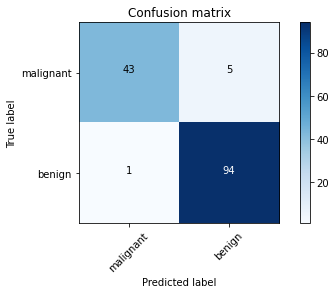

In [37]:
plot_confusion_matrix(cm, classes= data.target_names)

43 5 1 94
False Positive Rate, FPR = FP/N = FP/(FP+TN): 0.104
True Positive Rate, TPR = TP/P = TP/(TP+FN): 0.989
Normalized confusion matrix
[[0.89583333 0.10416667]
 [0.01052632 0.98947368]]


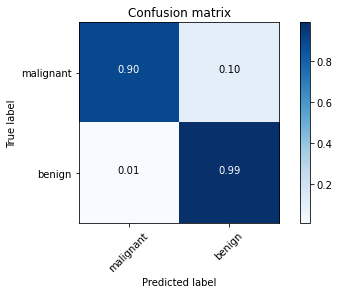

In [38]:
plot_confusion_matrix(cm, classes= data.target_names, normalize=True)

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba[:,1])


In [40]:
def plot_roc_curve(fpr, tpr, lw):
    area = auc(fpr, tpr)
    # plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {area})')
    # plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {area})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    

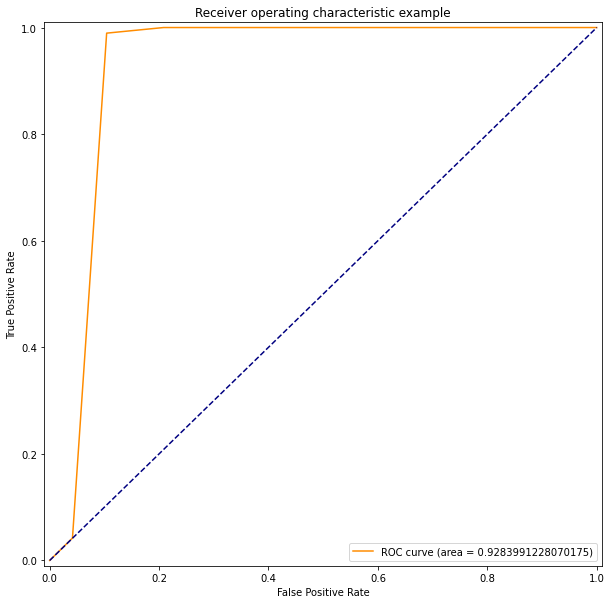

In [41]:
plt.figure(figsize=(10,10))
plot_roc_curve(fpr, tpr, lw=data.target_names)
plt.show()

In [42]:
thresholds

array([2.        , 1.        , 0.97244094, 0.13043478, 0.        ])